## The introduction to Scikit-Learn(sklearn)

### 0. An end-to-end Scikit-Learn workflow

In [1]:
#Standart imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. get the data ready
heart_diseas = pd.read_csv("heart-disease.csv")
heart_diseas.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X(feature matrix)
X = heart_diseas.drop("target", axis=1)

# Create y (labels)
y = heart_diseas["target"]

In [4]:
# 2. Choose the right model and hyperparameters to solve the problem (our goal is correct classification)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We`ll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

# test_size = 0.2 -> 20% of data for test, 80% - for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

/Users/julia/Desktop/sample/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
# Scikit-learn models(clf here) expect input data (X) in the shape (n_samples, n_features), meaning (n-columns, n-rows) 
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [9]:
y_test

228    0
181    0
38     1
47     1
129    1
      ..
281    0
296    0
278    0
11     1
27     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on training data and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8360655737704918

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[23,  8],
       [ 2, 28]])

In [14]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [15]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)* 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%



In [16]:
# 6. Save a model and load it
import pickle

# wb -> write binaries
pickle.dump(clf, open("random_1.pkl", "wb"))

In [17]:
# rb -> read binaries
loaded_model = pickle.load(open("random_1.pkl", "rb"))

In [18]:
loaded_model.score(X_test, y_test)

0.8360655737704918

## 1. Getting data ready to be used with ML

Three main things we need to do:
1. Split the data into feature and labels(usually 'X' & 'y')
2. Filling or disregarding missing values(if so)
3. Converting non-numerical values to numerical values(feature endcoding)

In [19]:
heart_diseas.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_diseas.drop("target", axis=1) # we will use target column as our y label = desired result
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_diseas["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# train_test_split(features, labels, % of test data 0.2 = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# here 13 - features- columns, fo y -> only 1 column

((242, 13), (61, 13), (242,), (61,))

In [24]:
# total, 242 - 80% for training
X.shape

(303, 13)

### 1.1 Make sure it is all numerical

In [25]:
cars = pd.read_csv("car-sales.csv")
cars.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [26]:
cars['Price'] = (
    cars['Price']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)     # raw string here
    .str.replace(r'\.00', '', regex=True)   
    .astype(int)                           
)

In [27]:
cars.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500


In [28]:
len(cars)

10

In [29]:
# Split into X/y Price -> goal
X = cars.drop("Price", axis = 1)
y = cars["Price"]

In [30]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Build ML model, Regressor -> try to predict a number based on other
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# train model with train data and desired result
model.fit(X_train, y_train)
# evaluate model with test data
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [32]:
# Expected error -> we need to tramsform all category columns/features to number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [33]:
pd.DataFrame(transformed_X)

# we have 12(0-11) diferent values for category(like Make Honda, Toyota, Colour green) 
# and 10(0-9) rows. 1 - if the value is this category(like Toyota is Toyota)
# 0 - if not. 12 for Odometer column -  unchanged

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [34]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4


In [35]:
dummies = pd.get_dummies(cars[["Make", "Colour", "Doors"]]).astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [36]:
# Let`s refit model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
model.score(X_test, y_test)

-1.2793638399999998

In [38]:
# This result is because of to few data(only 10 rows)

In [39]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [40]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]


In [41]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", # name
                                   one_hot, # transformer
                                   categorical_features)], # columns
                                remainder="passthrough") # left rest columns unchanged

# turn categorical features into numbers
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [42]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [43]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# very low % of model

0.3235867221569877

### What if there are missing values
1. Fill them with some data(imputation)
2. Remove the samples with missing data altogether

In [44]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
# isna how many missing NaN data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Try to convert into numbers

# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Which I need to transform to numerical
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [48]:
# Here is no error(ValueError: Input contains NaN) for NaN in new version but we continue in any case

In [49]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [50]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

#Fill the "Doors" column(can be only 3, 5 or 5)
car_sales_missing["Doors"].fillna(4)

/var/folders/zc/jlr_twg94wx5f4ksmmgf1lt80000gn/T/ipykernel_12256/1735199213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/var/folders/zc/jlr_twg94wx5f4ksmmgf1lt80000gn/T/ipykernel_12256/1735199213.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

0      4.0
1      5.0
2      4.0
3      4.0
4      3.0
      ... 
995    4.0
996    3.0
997    4.0
998    4.0
999    4.0
Name: Doors, Length: 1000, dtype: float64

In [51]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [53]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [54]:
len(car_sales_missing)

856

In [55]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Which I need to transform to numerical
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(856, 16))

In [57]:
# Looks like we converted our sales data into numbers

### Option 2: Fill missing values with Scikit-learn

In [58]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [59]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [60]:
# Drop rows with no values
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [61]:
# Split into X and y berore any filling missing values
X = car_sales_missing.drop(["Price"], axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
# Check missing values for features(X)
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [63]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values - with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean") # means mean() from all for this case

# Define columns/features
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data), it works for different type of columns
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])
# Fill train(fit_transform) and test(transform) values seperately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)

In [64]:
# Let`s check how many data are missing from each set
car_sales_filled_train = pd.DataFrame(filled_X_train,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [65]:
# Check missing data in train set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [66]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [67]:
# Check the original
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [68]:
# Turn data to number
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [69]:
# Now we have our data as numbers and filled
# Lets fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test) # test the model

0.21229043336119102

## 2. Choosing the right estimator/algorithm for your problem

Note:
* Sklearn refers to ML learning models/algorithms as estimators.
* Classification problem - predicting a category(heart disease or not)
    * clf (short for classifier)
* Regression problem - predicting a number(selling price of a car based on ...)
If you are not sure what model you should use - check sklearn ML map: https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a ML model for a regression problem

In [70]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [71]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
# Import algorithm/estimator(from map)
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantinate and fit the model(on training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score(relationships between linear values) of the model on the test set
model.score(X_test, y_test)

0.5758549611440126

In [75]:
# Let`s try to improve aour result -- choose another ML model
from sklearn.linear_model import Lasso

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantinate and fit the model(on training set)
model = Lasso()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)


0.28416718210084113

In [76]:
# Let`s try to improve aour result - choose another ML model
# Ensemble model - group of smaller models for better result
# We try Random Forest Regressor(on of the most popular ensemble model)
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantinate and fit the model(on training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.8059809073051385

## 2.2 Picking ML for classification problem

In [77]:
# Get iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [78]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
iris_df["target"] = iris["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
# Import algorithm/estimator(from map)
from sklearn.svm import LinearSVC

# Set up seed
np.random.seed(42)

# Create the data
X = iris_df.drop("target", axis=1)
y = iris_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantinate and fit the model(on training set)
clf = LinearSVC()
clf.fit(X_train, y_train)

# Score the trained model by test
clf.score(X_test, y_test)

1.0

In [81]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [82]:
# Let`s try another model

# Import algorithm/estimator(from map)
from sklearn.neighbors import NearestNeighbors

# Set up seed
np.random.seed(42)

# Create the data
X = iris_df.drop("target", axis=1)
y = iris_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantinate and fit the model(on training set)
clf = NearestNeighbors()
clf.fit(X_train, y_train)

# Score the trained model by test
clf.score(X_test, y_test)

AttributeError: 'NearestNeighbors' object has no attribute 'score'

In [ ]:
# Let`s try another model

# Import algorithm/estimator(from map)
from sklearn.ensemble import RandomForestClassifier

# Set up seed
np.random.seed(42)

# Create the data
X = iris_df.drop("target", axis=1)
y = iris_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantinate and fit the model(on training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Score the trained model by test
clf.score(X_test, y_test)

# Tips:
1. If you have structured data - use ensemble methods
2. If you have unstructured data - use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

* X = features
* y = labels, targets

In [ ]:
heart_diseas.head()

In [ ]:
# Import algorithm/estimator(from map)
from sklearn.ensemble import RandomForestClassifier

# Set up seed
np.random.seed(42)

# Create the data
X = heart_diseas.drop("target", axis=1)
y = heart_diseas["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantinate and fit the model(on training set)
clf = RandomForestClassifier()

# Fit the model to the data(training ml model)
clf.fit(X_train, y_train)

# Score the trained model by test(use the patterns the model had learn)
clf.score(X_test, y_test)

In [ ]:
X.head()

In [ ]:
y.head()

### 3.2 Make predictions using a ML model

2 ways to make predictions:
1. 'predict()'
2. 'predict_proba()'

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn`t work...

In [ ]:
clf.predict(X_test) # clf trained on train not test data and test is new for predict

In [ ]:
np.array(y_test)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test) # suggestion based on trained model
np.mean(y_preds == y_test) #compare

In [ ]:
clf.score(X_test, y_test) # the same as compare predictions with thrue labels

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

In [ ]:
# Make predictions with predict_proba() - returns probabilities of the classification labels

clf.predict_proba(X_test[:5])

In [ ]:
# 89% - 0(no heart disease), 11% - 1(heart disease) etc.

In [ ]:
# Let`s predict on the same data
clf.predict(X_test[:5])

In [ ]:
heart_diseas["target"].value_counts()

In [ ]:
# predict for regression model
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [83]:
y_preds[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [84]:
np.array([y_test[:10]])

array([[1, 0, 2, 1, 1, 0, 1, 2, 1, 1]])

In [85]:
len(y_preds), len(y_test)

(61, 30)

In [86]:
# Regression evaluation metrics(R2)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) # average in difference between actual amd predict

ValueError: Found input variables with inconsistent numbers of samples: [30, 61]

## 4. Evaluating a ML model

Three ways to evaluate sklearn models/estimators:
1. Estimator`s build-in score() method
2. The scoring parameter
3. Problem-specific metric fuctions

### 4.1 Evaluating a model with 'score()' method

In [87]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X,y
X = heart_diseas.drop("target", axis=1)
y = heart_diseas["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit the model to a training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
# The highest value for score = 1.0, the lowest = 0.0
clf.score(X_train, y_train)

1.0

In [89]:
clf.score(X_test, y_test)

0.8524590163934426

Let`s use the 'score()' method on regression problem...

In [90]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X,y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create regression model instance
model = RandomForestRegressor()

# Fit the model to a training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
# The default score() evaluation metric is r_squared for regression
model.score(X_test, y_test)

# In regression score returns the coeficient of derermination
# in classification - the mean accuracy

0.8059809073051385

### 4.2 Evaluating a model using the 'scoring' parameter

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X,y
X = heart_diseas.drop("target", axis=1)
y = heart_diseas["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit the model to a training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
clf.score(X_test, y_test)

0.8524590163934426

In [94]:
cross_val_score(clf, X, y) # devide on test and train each time with different values are test and train

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [95]:
 np.random.seed(42)

# Single training and test score
clf_single_score = clf.score(X_test, y_test)

# The mean 0f 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [96]:
# so score() is mean of cross_val_score

In [97]:
# Scoring param set to None by default
# if none - use the default for current model(in ou case for classification = mean accuracy)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diseas.drop("target", axis=1)
y = heart_diseas["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [101]:
np.mean(cross_val_score) # accuracy

np.float64(0.8248087431693989)

In [104]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model`s true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when thruth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [105]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
from sklearn.metrics import roc_curve

# Fit the model
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10] # we need probs only for positve

array([[0.58, 0.42],
       [0.16, 0.84],
       [0.49, 0.51],
       [0.77, 0.23],
       [0.54, 0.46],
       [0.1 , 0.9 ],
       [0.29, 0.71],
       [0.98, 0.02],
       [0.1 , 0.9 ],
       [0.46, 0.54]])

In [110]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.84, 0.51, 0.23, 0.46, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [111]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.31034483, 0.34482759, 0.34482759, 0.4137931 , 0.44827586,
       0.51724138, 0.5862069 , 0.5862069 , 0.65517241, 0.72413793,
       0.82758621, 1.        ])

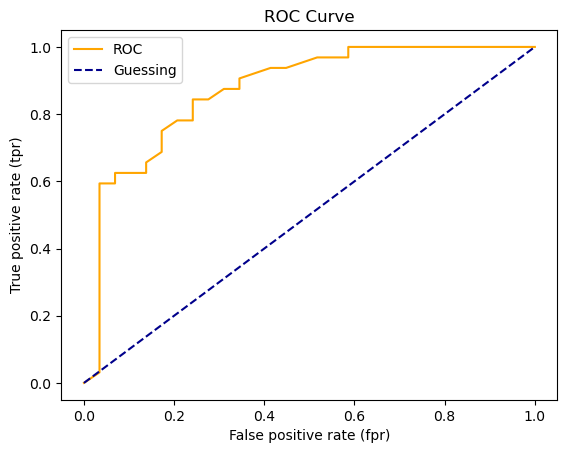

In [113]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curce given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [117]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive) # area/figure under curve

np.float64(0.8717672413793104)

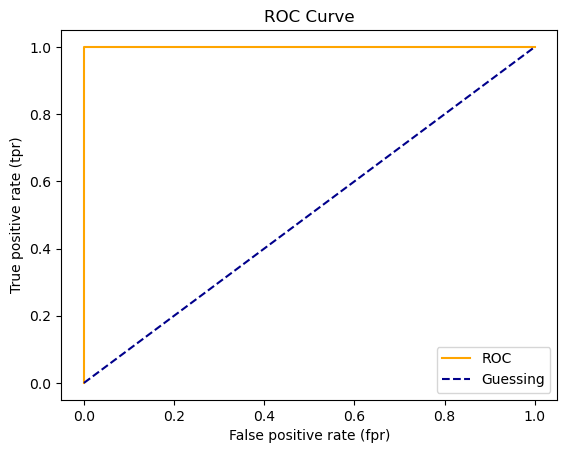

In [118]:
# Plot perfect ROC curve and AUC score
fpr, tpr, therholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [120]:
# Perfect AUC score(not in real life)
roc_auc_score(y_test, y_test)

np.float64(1.0)

### Confusion matrix 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essense, givving you an idea of where the model getting confused.

In [122]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds) # actual vs predict

array([[22,  7],
       [ 5, 27]])

In [123]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,22,7
1,5,27


In [127]:
# 22 corrct for 0, 27 correct for 1
# 7 - false positive, 5 - false negative
22 + 7 + 5+ 27

61

In [128]:
len(y_test)

61

In [129]:
# 7 and 5 - where confution appears

In [131]:
# we need to install seaborn to our Conda environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn

done
Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: - 

## Package Plan ##

  environment location: /Users/julia/Desktop/sample/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       hca03da5_0         131 KB
    openssl-3.0.16             |       h02f6b3c_0         4.3 MB
    seaborn-0.13.2             |  py312hca03da5_2         714 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.13.2-py312hca03da5_2 

The following packages will be UPDATED:

  ca-certificates                     2024.12.31-hca03da5_0 --> 2025.2.25-hca03da5_0 
  openssl                                 3

<Axes: >

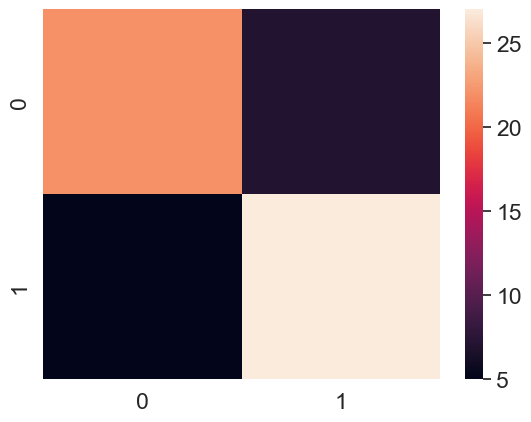

In [132]:
# Make our confusion matrix more visual with Seaborn`s heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)


### Creating a confusion matrix using Scikit-Learn(version 1.0+)

In [134]:
import sklearn
sklearn.__version__

'1.6.1'

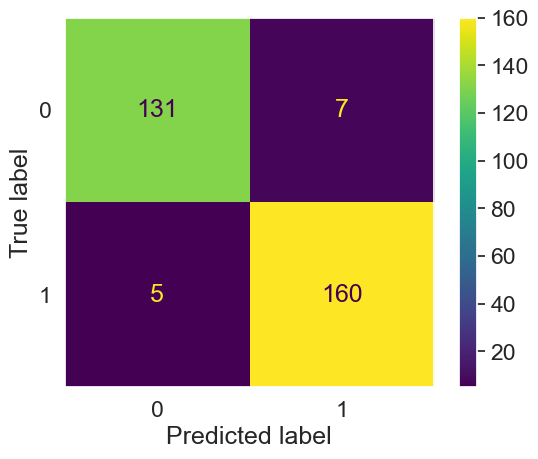

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)
disp.ax_.grid(False)

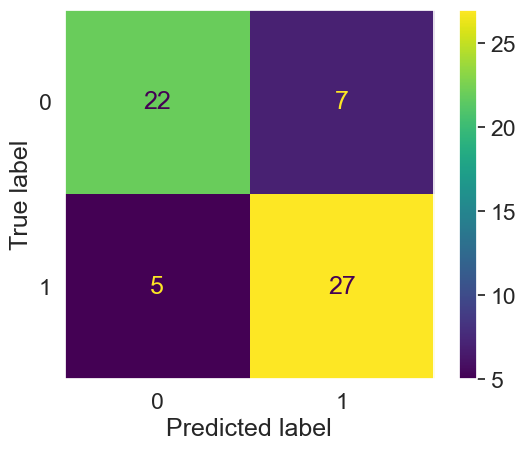

In [139]:
disp2 = ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)
disp2.ax_.grid(False)

**Classification Report**

This is a number of evaluations

In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [142]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only 1 positive vase, very unballanced data

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/Users/julia/Desktop/sample/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julia/Desktop/sample/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julia/Desktop/sample/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

The ones we`re going to cover:
1. R^2 - coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [143]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [145]:
model.score(X_test, y_test) # coefficient of determination - default for regression

0.8059809073051385

In [146]:
y_test.mean()

np.float64(2.0550030959302323)

In [148]:
# another way to determibe r^2
from sklearn.metrics import r2_score

# Fill an array with y_test mean values
y_test_mean = np.full(len(y_test), y_test.mean())

In [149]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [151]:
r2_score(y_true=y_test, y_pred=y_test_mean) # example of bad model

0.0

In [152]:
r2_score(y_true=y_test, y_pred=y_test) # the perfect model

1.0

**Mean absolute error**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model predictions are.

In [155]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)


0.3270458119670544

In [189]:
df = pd.DataFrame(data={"actual values" : y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"] # how predicted differs from actual in one(+) or another side(-)
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [190]:
df["differences"].mean() # it differs from mae because of negative values

np.float64(0.011913192441860052)

In [191]:
# let`s do with module(abs)
np.abs(df["differences"]).mean()

np.float64(0.3270458119670544)

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [192]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [193]:
df["square_differences"] = np.square(df["differences"]) # ^2 our column
df.head()

,actual values,predicted values,differences,square_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [194]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

np.float64(0.2542443610174998)

In [199]:
df_large_error = df.copy()
df_large_error.iloc[0]["square_differences"] = 16

/var/folders/zc/jlr_twg94wx5f4ksmmgf1lt80000gn/T/ipykernel_12256/2464324312.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["square_differences"] = 16


In [200]:
df_large_error

,actual values,predicted values,differences,square_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [201]:
# Calculate MSE with large data (16) -> not changed a lot
df_large_error["square_differences"].mean()

np.float64(0.25812028533523235)

In [202]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,square_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [204]:
# Calculate MSE with large data (16, 20)
df_large_error["square_differences"].mean()

np.float64(0.7342642968470183)

In [205]:
# So if values has big difference(like 0.01 and 20) -> mse is a good evaluation

### 4.2.3 Finally using the 'scoring' parameter

In [206]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diseas.drop("target", axis=1)
y = heart_diseas["target"]

clf = RandomForestClassifier()

In [207]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if None -> default scoring(here accuracy for classification)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [208]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [209]:
np.random.seed(42) # split data each time the same not random
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [210]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [216]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [217]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [218]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [219]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let`s see the 'scoring' parameter being using for a regression problem

In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [221]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None) # if None - default = r2(for regression)
np.mean(cv_r2)

np.float64(0.6516423891480653)

In [222]:
# Mean absolute error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error") # check doc: higher is better -> negative_mean
np.mean(cv_mse)

np.float64(-0.4311302337214557)

In [223]:
# Mean squaared error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error") # check doc: higher is better -> negative_mean
np.mean(cv_mae)

np.float64(-0.4648809080426357)

### 4.3 Ussing different evaluation metrics as Scikit-learn functions

The 3rd way to evaluate sckit-learn ML models/estimators is to using the 'sklearn.metrics' module

In [226]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_diseas.drop("target", axis=1)
y = heart_diseas["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [228]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Regressor metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regressor metrics on the test set
R2 score: 0.8059809073051385
MAE: 0.3270458119670544
MSE: 0.2542443610174998


In [229]:
# These metrics are found by 1 train_test_split (not like in cross_validation)

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? (more imformation/features about each sample)

From a model prespective
* Is there a better model we can use?(ml map -> more complex model)
* Could we improve the current model?

Parameters vs. Hyperparameters
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve the ability to find patterns

Three ways to adjust hyperparameters:
* By hand
* Randomly with RandomSearchCV
* Eshaustively with GridSearchCV

In [230]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [231]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let`s make 3 sets: training, validation and test.

In [232]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We`re going to try and adjust:

* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'mean_samples_split'
* 'n_estimators'

In [239]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comparison on y_true labels vs. y_preds labels 
    on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc {accuracy * 100:.2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall: .2f}")
    print(f"F1 score: {f1: .2f}")

    return metric_dict

In [240]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffeled = heart_diseas.sample(frac=1)

# Split into X & y
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split the data into train, validation and test
train_split = round(0.7 * len(heart_disease_shuffeled)) # 70% of data for train, index
valid_split = round(train_split + 0.15 * len(heart_disease_shuffeled)) # 15% of data, index
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on validation data
y_preds = clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc 82.22%
Precision:  0.81
Recall:  0.88
F1 score:  0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [242]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with diff hyperparams
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second clf
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc 80.00%
Precision:  0.83
Recall:  0.80
F1 score:  0.82


In [243]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth = 10)
clf_3.fit(X_train, y_train)

# Make predictions with diff hyperparams
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the third clf
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc 82.22%
Precision:  0.84
Recall:  0.84
F1 score:  0.84


### 5.2 Hyperparameter tuning with RandomizedSearchSV

In [246]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [248]:
# Make the predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc 81.97%
Precision:  0.77
Recall:  0.86
F1 score:  0.81


In [249]:
# Looks not better -> because random which may be worser

### 5.3 Hyperparameter tuning with GridSearchCV

In [250]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [252]:
6*5*2*3*3*5

2700

In [253]:
# We reduce amount of hyperparameters(close to our best params)
grid_2 = {'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [254]:
3*1*2*1*2*5

60

In [264]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Split into X & y
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split into train and test sets(no validation set because we use here a cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
# clf = RandomForestClassifier(n_jobs=1) # how much of computer processor you dedicate to this job

# Setup GridSearchCV(CV - cross validation) - take classifier and params and search for all combinations
# gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                            cv=5,
                           verbose=2)

# Fit the RS CV version of clf
gs_clf.fit(X_train, y_train)

IndentationError: unexpected indent (815570487.py, line 15)

In [256]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [257]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc 83.61%
Precision:  0.83
Recall:  0.88
F1 score:  0.86


Let`s compare our different model metrics

<Axes: >

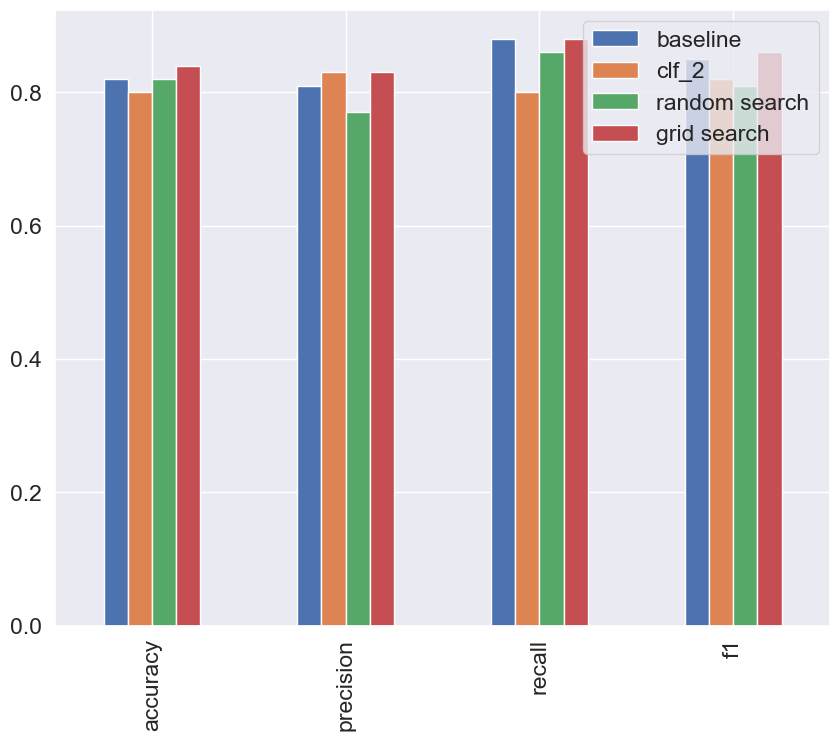

In [259]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8))

## 6. Saving and loading trained ML models

2 ways to save and load:
1. With Python 'pickle' module
2. With the 'joblib' module

**Pickle**

In [261]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) # wb = write binary

In [262]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb")) # rb = read binary

In [265]:
# Check loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc 83.61%
Precision:  0.83
Recall:  0.88
F1 score:  0.86


{'accuracy': 0.84, 'precision': 0.83, 'recall': 0.88, 'f1': 0.86}

**Joblib**

In [266]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_2.joblib")

['gs_random_forest_model_2.joblib']

In [267]:
# Load joblib model
loaded_job_model = load("gs_random_forest_model_2.joblib")

In [269]:
# Check loaded model
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc 83.61%
Precision:  0.83
Recall:  0.88
F1 score:  0.86


{'accuracy': 0.84, 'precision': 0.83, 'recall': 0.88, 'f1': 0.86}

## 7. Putting it all together

In [271]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [272]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [274]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [275]:
# All data needs to be numerical and no missing data

Steps we one to do:
1. Fill missing data
2. Convert data to numbers
3. Build a model in a data

In [282]:
#Getting data ready
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True) # remove rows which contains missing Price(our target) values

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps(fill missing data, convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)
    ])

# Create preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It`s also possible to use 'GridSearchCV' or 'RandomizedSearchCV' with our 'Pipeline'

In [285]:
# Use GridSearchCV with our regression pipeline(a little bit different as well as this is a pipeline, see documentation)
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [286]:
gs_model.score(X_test, y_test)

0.2848784564026805